In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import LeakyReLU
import numpy as np
import matplotlib.pyplot as plt
import cv2


class_names = ['The Mona Lisa', 'airplane', 'backpack', 'cake', 'dog',
               'fish', 'guitar', 'skull', 'traffic light', 'windmill']


model = load_model("/content/cnn (1).keras", custom_objects={'LeakyReLU': LeakyReLU})


def preprocess_image(img_path, target_size=(64, 64)):
    original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    _, thresh = cv2.threshold(original, 10, 255, cv2.THRESH_BINARY_INV)
    coords = cv2.findNonZero(thresh)
    x, y, w, h = cv2.boundingRect(coords)
    cropped = original[y:y+h, x:x+w]
    resized = cv2.resize(cropped, target_size, interpolation=cv2.INTER_AREA)
    img_array = img_to_array(resized) / 255.0
    input_array = np.expand_dims(img_array, axis=0)
    return input_array, resized

def predict_and_show(image_paths, model, class_names):
    plt.figure(figsize=(15, 8))

    for idx, img_path in enumerate(image_paths):
        try:
            input_array, resized = preprocess_image(img_path)
            pred = model.predict(input_array)[0]
            pred_class = np.argmax(pred)
            pred_label = class_names[pred_class]
            pred_conf = pred[pred_class] * 100
            plt.subplot(2, 3, idx + 1)
            plt.imshow(resized, cmap='gray')
            plt.title(f"{pred_label}\n({pred_conf:.1f}%)", fontsize=10)
            plt.axis('off')
        except Exception as e:
            print(f"Lỗi khi xử lý ảnh {os.path.basename(img_path)}: {e}")

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


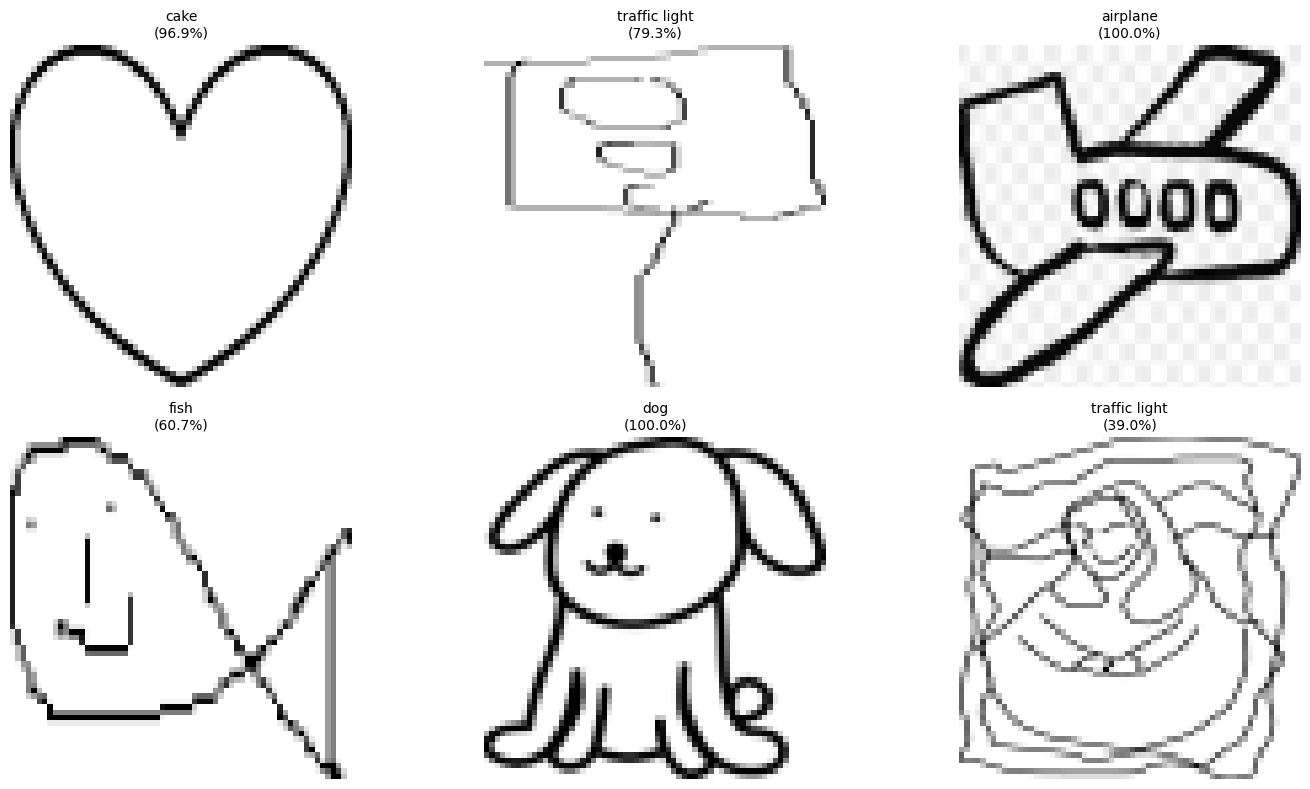

In [2]:
image_paths = [
    "/content/ảnh 1.png",
    "/content/ảnh 2.png",
    "/content/ảnh 3.png",
    "/content/ảnh 4.png",
    "/content/ảnh 5.png",
    "/content/ảnh 6.png"
]
predict_and_show(image_paths, model, class_names)